# Oil Well Clustering Analysis
This report presents an analysis of oil well data using k-means clustering.
We aim to segment the wells based on their production volume and operating costs to gain insights into different clusters of wells.

<div style="position:relative;">
  <img src="image3.jpg" style="width:400px; opacity:0.8;">
</div>

## Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load the data

In [4]:
df = pd.read_csv('oil_well_data.csv')

In [5]:
df.head()

,Well ID,Production Date,Production Volume (BBL/day),Operating Costs (USD/day),Well Location,Weight of Crude Oil,API Gravity,Well Depth (Feet),Well Type,Well Pressure (PSI)
0,Well_1,2022-03-04,155.764515,2339.202397,Abqaiq,Heavy,15.925342,891.224747,Offshore,2734.675561
1,Well_1,2019-09-25,80.193546,799.279541,Abqaiq,Heavy,11.590701,3655.962381,Onshore,2655.913924
2,Well_1,2019-09-15,259.418591,3895.707155,Abqaiq,Medium,28.640735,1750.421038,Offshore,4428.291370
3,Well_1,2017-05-31,959.352419,14392.592910,Abqaiq,Medium,25.512856,4132.077230,Offshore,2306.630830
4,Well_1,2020-02-25,559.416687,8393.486704,Abqaiq,Medium,27.400479,3098.084654,Offshore,2236.400594


## Selecting Features for Clustering
We will select the relevant features ('Production Volume (BBL/day)' and 'Operating Costs (USD/day)') for the clustering analysis.

In [6]:
features = df[['Production Volume (BBL/day)', 'Operating Costs (USD/day)']]

## Finding the Optimal Number of Clusters
We will use two methods, silhouette score and the elbow method, to find the optimal number of clusters (k) for k-means clustering.

### Silhouette Score

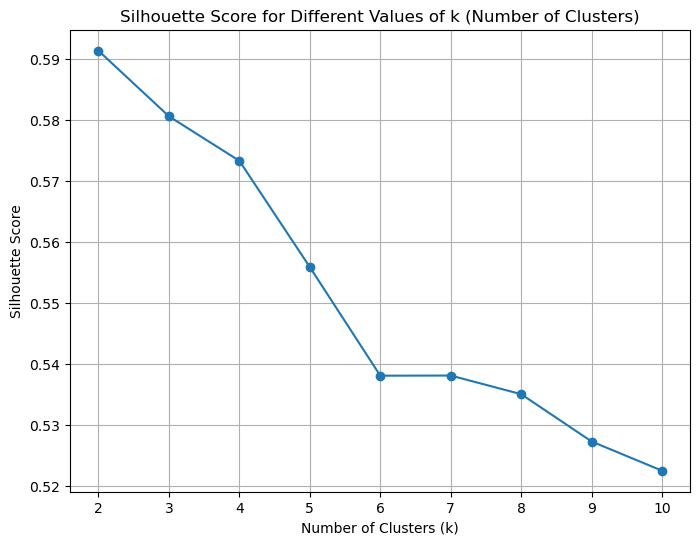

In [7]:
# Explore different values of k to find the optimal number of clusters by silhouette score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_scores.append(silhouette_score(features, cluster_labels))
    
# Plot the silhouette scores for different values of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k (Number of Clusters)')
plt.grid(True)
plt.show()

### Elbow Method

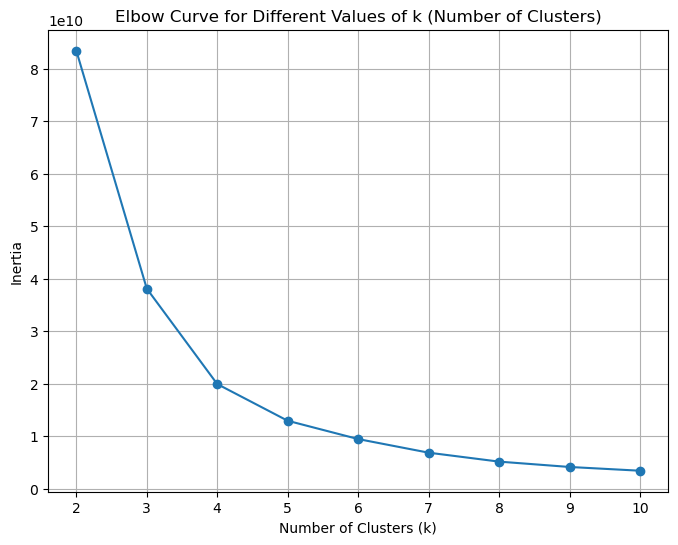

In [8]:
# Explore different values of k to find the optimal number of clusters by elbow method
k_values = range(2, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to visualize the inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Different Values of k (Number of Clusters)')
plt.grid(True)
plt.show()


### Based on both methods, we will choose <span style="color:red">k=6</span> for the number of clusters.

## Performing K-means Clustering
We will perform k-means clustering with k=6 and add the cluster labels to the DataFrame.

In [9]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

## Visualizing the Clusters
Let's visualize the clusters based on 'Production Volume (BBL/day)' and 'Operating Costs (USD/day)'.

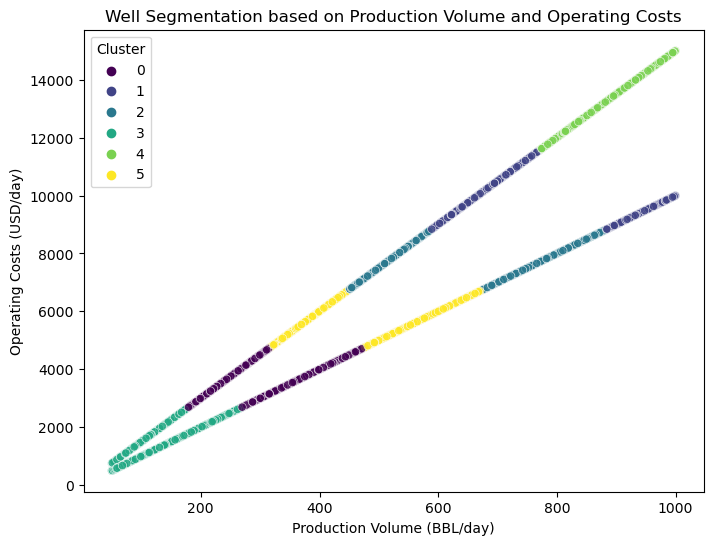

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Production Volume (BBL/day)', y='Operating Costs (USD/day)', hue='Cluster', data=df, palette='viridis', alpha=0.8)
plt.xlabel('Production Volume (BBL/day)')
plt.ylabel('Operating Costs (USD/day)')
plt.title('Well Segmentation based on Production Volume and Operating Costs')
plt.show()

## Evaluating the Clustering
We will evaluate the quality of the clustering using the silhouette score

In [11]:
silhouette_avg = silhouette_score(features, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5380308335399853


## Interpretation and Analysis of Clusters

In [12]:
# 1. High-Producing Wells
high_producing_wells1 = df[(df['Cluster'] == 1) & (df['Well Type'] == "Onshore")]  
high_producing_wells2 = df[(df['Cluster'] == 4) & (df['Well Type'] == "Offshore")]
print(f'Number of High Producing well(Onshore) : {high_producing_wells1.shape[0]}')
print(f'Number of High Producing well(Offshore) : {high_producing_wells2.shape[0]}')

Number of High Producing well(Onshore) : 1238
Number of High Producing well(Offshore) : 2366


In [13]:
# 2. Low-Producing Wells
low_producing_wells1 = df[(df['Cluster'] == 3) & (df['Well Type'] == "Onshore")]  
low_producing_wells2 = df[(df['Cluster'] == 3) & (df['Well Type'] == "Offshore")]
print(f'Number of Low Producing well(Onshore) : {low_producing_wells1.shape[0]}')
print(f'Number of Low Producing well(Offshore) : {low_producing_wells2.shape[0]}')

Number of Low Producing well(Onshore) : 2327
Number of Low Producing well(Offshore) : 1305


In [14]:
# 3. Regional Variation
region_groups = df.groupby('Well Location')
for region, data in region_groups:
    print(f"Region: {region}")
    print(data['Cluster'].value_counts())
    print('-'*60)

Region: Abqaiq
Cluster
3    589
2    568
0    526
5    514
1    467
4    336
Name: count, dtype: int64
------------------------------------------------------------
Region: Ghawar
Cluster
3    1181
5    1169
2    1155
0    1114
1     998
4     783
Name: count, dtype: int64
------------------------------------------------------------
Region: Haradh
Cluster
5    327
3    322
2    317
0    316
1    283
4    235
Name: count, dtype: int64
------------------------------------------------------------
Region: Khurais
Cluster
0    468
3    430
5    424
2    414
1    363
4    301
Name: count, dtype: int64
------------------------------------------------------------
Region: Khursaniyah
Cluster
2    430
0    412
5    382
3    372
1    353
4    251
Name: count, dtype: int64
------------------------------------------------------------
Region: Manifa
Cluster
2    304
5    303
0    295
3    276
1    251
4    171
Name: count, dtype: int64
------------------------------------------------------------
Regi

In [15]:
# 4. Operating Costs
cluster_groups = df.groupby('Cluster')
for cluster_id, data in cluster_groups:
    print(f"Cluster {cluster_id} - Mean Operating Costs: {data['Operating Costs (USD/day)'].mean()}")

Cluster 0 - Mean Operating Costs: 3710.8546082131775
Cluster 1 - Mean Operating Costs: 9883.792661319456
Cluster 2 - Mean Operating Costs: 7782.426208638969
Cluster 3 - Mean Operating Costs: 1642.351951262739
Cluster 4 - Mean Operating Costs: 13277.74404541475
Cluster 5 - Mean Operating Costs: 5726.172594357953


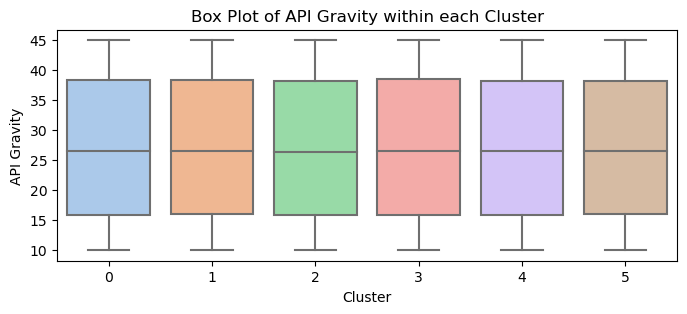

In [16]:
# Box Plot for API Gravity within each Cluster
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='Cluster', y='API Gravity', palette='pastel')
plt.xlabel('Cluster')
plt.ylabel('API Gravity')
plt.title('Box Plot of API Gravity within each Cluster')
plt.show()

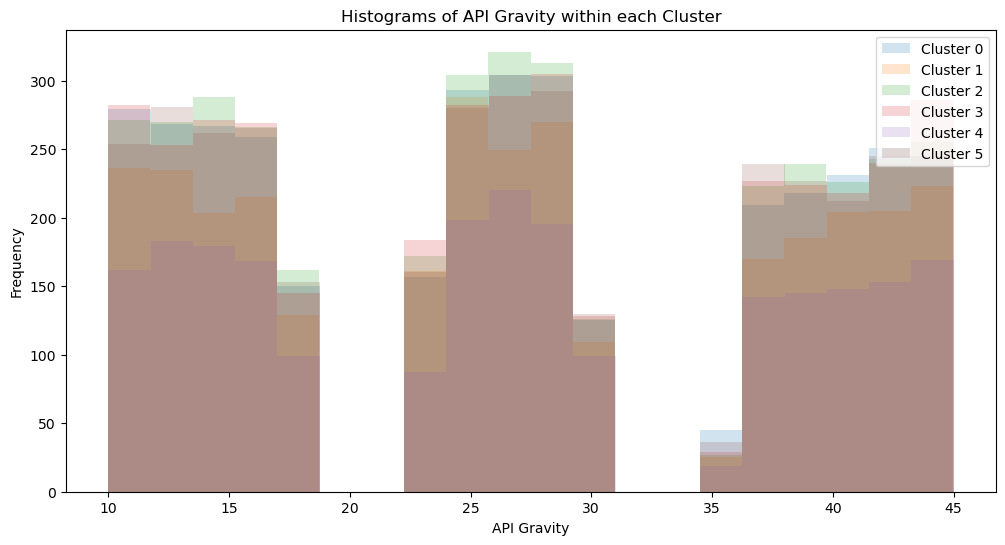

In [17]:
# Histograms for API Gravity within each Cluster
plt.figure(figsize=(12, 6))
for cluster, data in df.groupby('Cluster'):
    plt.hist(data['API Gravity'], bins=20, alpha=0.2, label=f'Cluster {cluster}')
plt.xlabel('API Gravity')
plt.ylabel('Frequency')
plt.title('Histograms of API Gravity within each Cluster')
plt.legend()
plt.show()

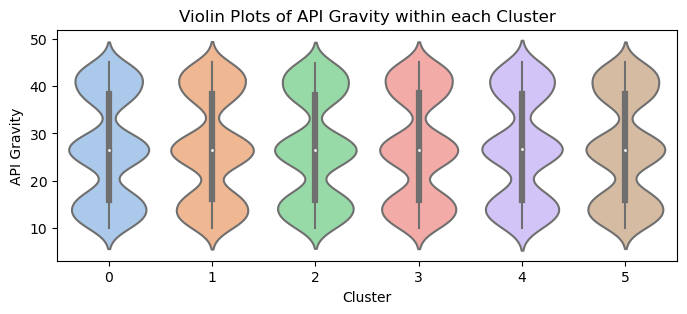

In [18]:
# Violin Plots for API Gravity within each Cluster
plt.figure(figsize=(8, 3))
sns.violinplot(data=df, x='Cluster', y='API Gravity', palette='pastel')
plt.xlabel('Cluster')
plt.ylabel('API Gravity')
plt.title('Violin Plots of API Gravity within each Cluster')
plt.show()

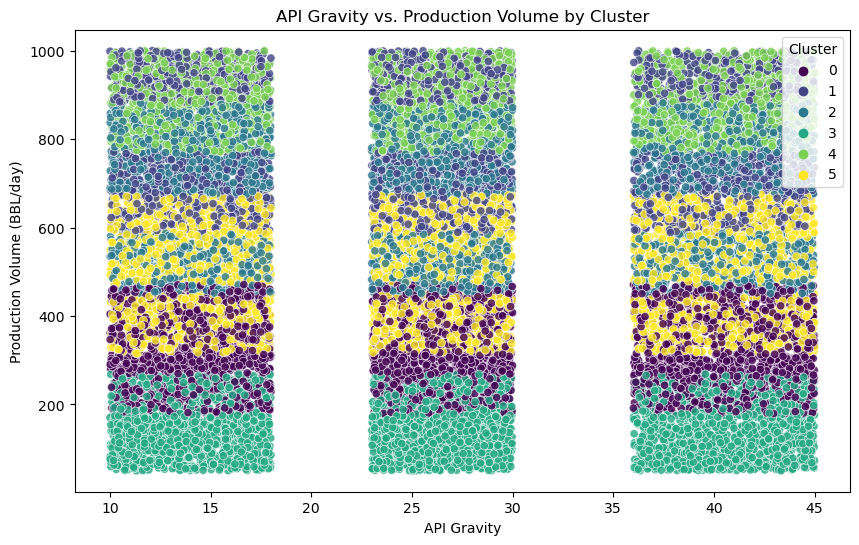

In [19]:
# Compare API Gravity with other Features (e.g., Production Volume)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='API Gravity', y='Production Volume (BBL/day)', hue='Cluster', palette='viridis', alpha=0.8)
plt.xlabel('API Gravity')
plt.ylabel('Production Volume (BBL/day)')
plt.title('API Gravity vs. Production Volume by Cluster')
plt.show()